In [1]:
import numpy as np
import porepy as pp
import scipy.sparse as sps
import math 
import sys
sys.path.append("../class")
from Flow_class import Flow
from Transport_class import Transport
from Reaction_class import Reaction
import change_porosity as chpor

In [2]:
Nx=100
Ny=5

In [3]:
#gb= pp.grid_buckets_2d.single_vertical([Nx, Ny], y_endpoints=[0.6, 0.2], simplex=False)
#gb, domain = pp.grid_buckets_2d.single_horizontal([Nx, Ny], x_endpoints=[0.2, 0.8], simplex=False)
#print(domain)
#pp.plot_grid(gb,figsize=[15,12])
#domain={'xmin': 0, 'xmax': 1, 'ymin': 0, 'ymax': 1}




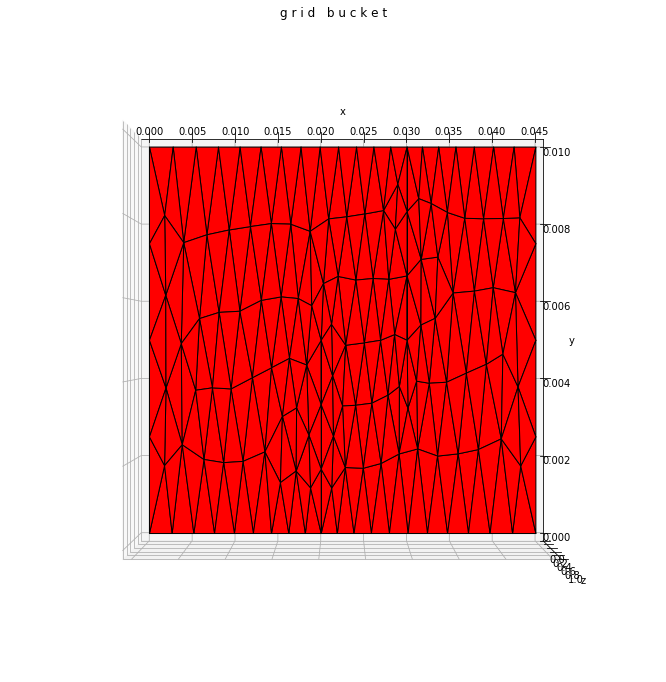

In [4]:
# Point coordinates, as a 2xn array
p = np.array([[0.02,0.02,0.03,0.03], [0,0.005,0.005,0.01]])
# Point connections as a 2 x num_frac arary
e = np.array([[0, 2], [1, 3]])

# The domain contains two fractures: The first from (0, 0) - (2,0), the second (1, 0) to (1, 1)
# Set domain boundaries
domain = {'xmin': 0, 'xmax': 0.045, 'ymin': 0, 'ymax': 0.01}

# Define a fracture network in 2d
network_2d = pp.FractureNetwork2d(p, e, domain)

# Set preferred mesh size close to the fracture, and at the boundary (essentially this is a far-field value)
#mesh_args = {'mesh_size_frac': 0.002, 'mesh_size_bound': 0.003}
mesh_args = {'mesh_size_frac': 0.002, 'mesh_size_bound': 0.003}


# Generate a mixed-dimensional mesh
gb = network_2d.mesh(mesh_args)
pp.plot_grid(gb,figsize=(15,12))

In [5]:
parameter_flow={"aperture":1e-3,
           #"fracture_perm":0.00001,
          #"fracture_perm_2":1e5,
           #"fracture_perm":1e5,
          "fracture_perm":1.0,
           #"fracture_perm":1e-20,
           #"perm":0.3,
           #"perm":1,
           "perm":1e-10,
          #"f_lambda":lambda x,y,z:math.pi*math.pi*2*math.sin(math.pi*x)*math.sin(math.pi*y),
          "f_lambda":lambda x,y,z:0.0,
          "bc_value":[15.0,0.0],
           #"bc_value":[0.0,0.0],
          "bc_type":['dir','dir'],
          "method":"Tpfa"}

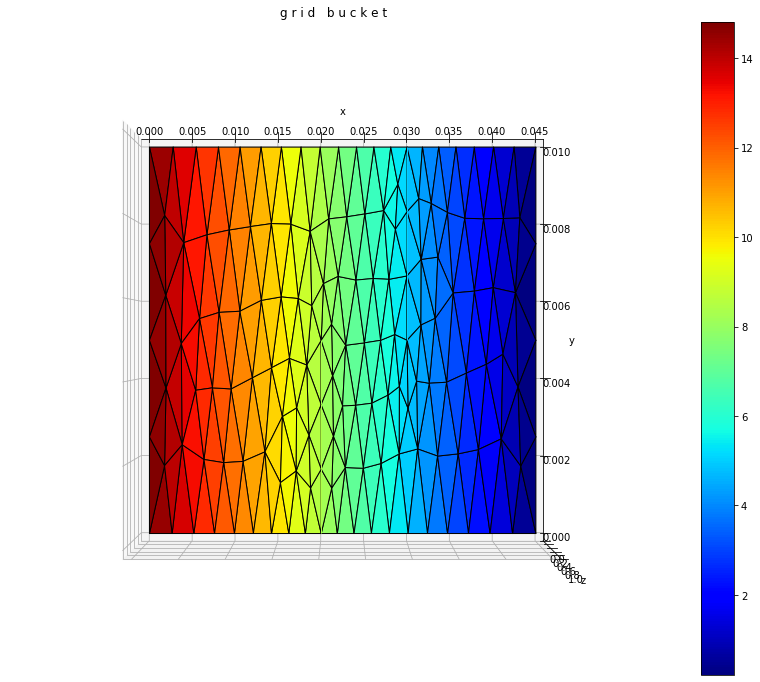

In [6]:
flow1=Flow(gb,domain,parameter_flow)
#flow.add_data()
flow1.set_data()
flow1.discretize()
flow1.solve()
flow1.plot_pressure()

In [7]:
parameter_transp={
    "aperture":1e-3,
    "por":0.3,
    #"por_frac":0.00001,
    #"por":1.0,
    "por_frac":0.3,
    #"time_step":1 / 60,
    "time_step":34.56,
    #"time_step":0.001,
    #"t_max":1 /3,
    "t_max":345600,
    #"t_max":0.1,
    "initial_cond":lambda x,y,z:0.0}

transport_Ca=Transport(gb,domain,parameter_transp)

In [8]:
Ca_value=[0.0,0.0]
Ca_type=['dir','dir']
CaSiO3_value=[0.0,0.0]
CaSiO3_type=['dir','dir']
Ca="Ca"
CaSiO3="CaSiO3"

In [9]:
transport_Ca.set_data(Ca_value,Ca_type,Ca)
transport_Ca.get_flux(Ca)
transport_Ca.discretize(Ca)
lhs_Ca,rhs_source_adv_Ca,rhs_mass_Ca,assembler_Ca=transport_Ca.get_transport_lhs_rhs(Ca)
#ciao?1



In [10]:
reaction_data={"temperature":423,
       "A":1.9e-2,
       #"rate_const":0.00446,
       "rate_const":0.0005,
       "E":4700,
       "R":8.314,
       "K_eq":10e9,
       "ph":3.5,
       "mass_weight":0.3*1.0}
reaction=Reaction(reaction_data)
reaction.set_const_rate()
print(reaction.const_rate)

2.4964205820053154e-06


P0_flux
[[ 3.32867643e-08  3.37197962e-08  3.29795704e-08  3.33612738e-08
   3.26837993e-08  3.26346698e-08  3.10622637e-08  3.23741460e-08
   3.31886847e-08  3.36551059e-08  3.20398722e-08  3.26645673e-08
   3.25069652e-08  3.39588246e-08  3.25337429e-08  3.23405383e-08
   3.16484784e-08  3.36700955e-08  3.26389810e-08  3.17168723e-08
   3.29485943e-08  3.36666403e-08  3.31131440e-08  3.26106577e-08
   3.29643008e-08  3.48298781e-08  3.37174225e-08  3.20245345e-08
   3.24655302e-08  3.29515804e-08  3.31664984e-08  3.17713844e-08
   3.26003710e-08  3.27629026e-08  3.29915595e-08  3.23966897e-08
   3.46555058e-08  3.27785037e-08  3.22672167e-08  3.46919837e-08
   3.27276577e-08  3.26536984e-08  3.37514764e-08  3.25622666e-08
   3.34449839e-08  3.09404717e-08  3.21523414e-08  3.25913093e-08
   3.30157669e-08  3.27456076e-08  3.26333206e-08  3.26157575e-08
   3.30379124e-08  3.10382253e-08  3.31338813e-08  3.26633998e-08
   3.38437656e-08  3.08628077e-08  3.34807923e-08  3.24029401e-08
  

/home/dell/anaconda3/lib/python3.8/site-packages/porepy/viz/plot_grid.py:127: MatplotlibDeprecationWarning: 
The M attribute was deprecated in Matplotlib 3.4 and will be removed two minor releases later. Use self.axes.M instead.
  xs, ys, zs = proj3d.proj_transform(xs3d, ys3d, zs3d, renderer.M)


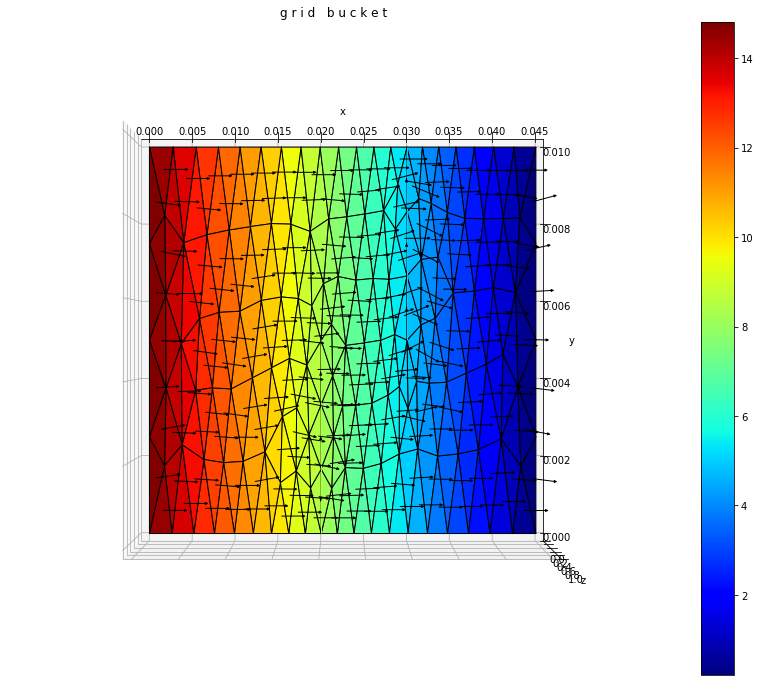

In [11]:
## to export the flux
key='Ca'
flux='darcy_flux'
mortar='mortar_flux'
flux_P0="P0_flux"

discr_P0_flux = pp.MVEM(key)
for g, d in gb:
    discr_P0_flux.discretize(g, d)
    d[pp.STATE][flux] = d[pp.PARAMETERS][key][flux]

## construct the P0 flux reconstruction
pp.project_flux(gb, discr_P0_flux, flux, flux_P0, mortar)

for g,d in gb:
    print("P0_flux")
    print(d[pp.STATE]["P0_flux"])

for g,d in gb:
    print("pressure")
    print(d[pp.STATE]["pressure"])
    
for g,d in gb:
    d[pp.STATE]["P0_flux"]*=100000
pp.plot_grid(gb,"pressure","P0_flux",figsize=(15,12))

In [12]:
# Point coordinates, as a 2xn array
p = np.array([[0.02,0.02,0.03,0.03], [0,0.005,0.005,0.01]])
# Point connections as a 2 x num_frac arary
e = np.array([[0, 2], [1, 3]])

# The domain contains two fractures: The first from (0, 0) - (2,0), the second (1, 0) to (1, 1)
# Set domain boundaries
domain = {'xmin': 0, 'xmax': 0.045, 'ymin': 0, 'ymax': 0.01}

# Define a fracture network in 2d
network_2d = pp.FractureNetwork2d(p, e, domain)

# Set preferred mesh size close to the fracture, and at the boundary (essentially this is a far-field value)
#mesh_args = {'mesh_size_frac': 0.002, 'mesh_size_bound': 0.003}
mesh_args = {'mesh_size_frac': 0.002, 'mesh_size_bound': 0.003}


# Generate a mixed-dimensional mesh
gb1= network_2d.mesh(mesh_args)
#pp.plot_grid(gb,figsize=(15,12))

In [13]:
parameter={"aperture":1e-3,
           #"fracture_perm":1e-20,
           "fracture_perm":1.0,
          #"fracture_perm_2":1e5,
           #"fracture_perm":1e5,
           #"fracture_perm":1.0,
           #"perm":0.3,
           "perm":1e-10,
           #"perm":1.0,
           #"f_lambda":lambda x,y,z:math.pi*math.pi*2*math.sin(math.pi*x)*math.sin(math.pi*y),
          "f_lambda":lambda x,y,z:0.0,
          #"bc_value":[3.0e-7,0.0],
          "bc_value":[0.0,0.0],
          "bc_type":['dir','dir'],
          "method":"Tpfa"}

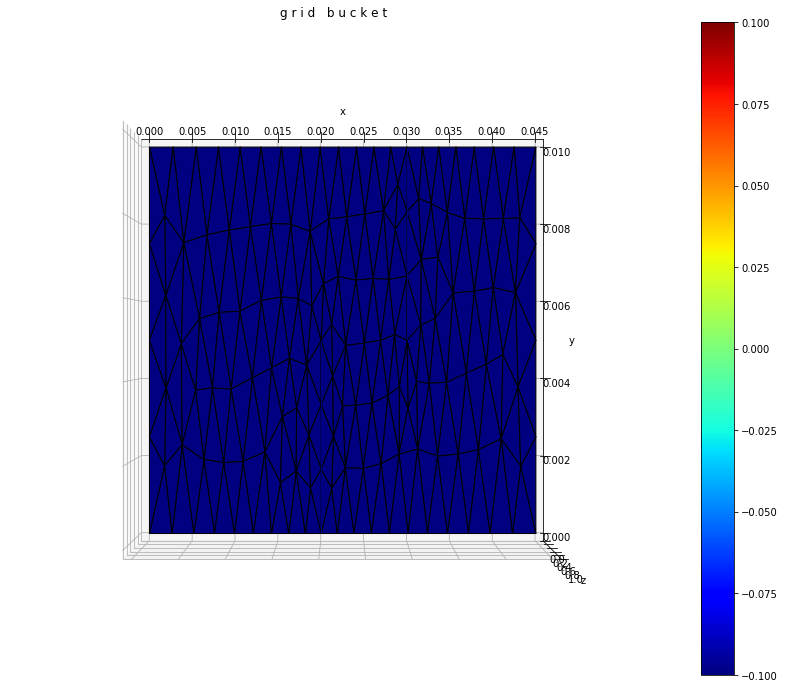

In [14]:
flow2=Flow(gb1,domain,parameter)
#flow.add_data()
flow2.set_data()
flow2.discretize()
flow2.solve()
flow2.plot_pressure()

In [15]:
parameter={
    "aperture":1e-3,
    "por":0.3,
    #"por_frac":0.00001,
    #"por":1.0,
    "por_frac":0.3,
    #"time_step":1 / 60,
    "time_step":34.56,
    #"time_step":0.001,
    #"t_max":1 /3,
    "t_max":345600,
    #"t_max":0.1,
    "initial_cond":lambda x,y,z:0.0}

transport_CaSiO3=Transport(gb1,domain,parameter)

In [16]:
transport_CaSiO3.set_data(CaSiO3_value,CaSiO3_type,CaSiO3)
transport_CaSiO3.get_flux(CaSiO3)    
transport_CaSiO3.discretize(CaSiO3)
lhs_CaSiO3,rhs_source_adv_CaSiO3,rhs_mass_CaSiO3,assembler_CaSiO3=transport_CaSiO3.get_transport_lhs_rhs(CaSiO3)

In [17]:
save_every = 100
n_steps = int(np.round(parameter["t_max"] / parameter["time_step"]))

# Initial condition
tracer1 = np.zeros(rhs_source_adv_Ca.size)
assembler_Ca.distribute_variable(
    tracer1, variable_names=[Ca,transport_Ca.mortar_variable+Ca]
)


#tracer2 = 16.7504*np.ones(rhs_source_adv_CaSiO3.size)
#tracer2 = 3.35008*np.ones(rhs_source_adv_CaSiO3.size)
tracer2=np.zeros(rhs_source_adv_CaSiO3.size)
l=0
for g,d in gb:
    if(g.dim == gb.dim_max()):
        for j in range(g.num_cells):
            tracer2[j]=58.6264
        l=g.num_cells
    else:
        for i in range(l,l+g.num_cells,1):
            print("i")
            print(i)
            tracer2[i]=58.6264
        l+=g.num_cells



assembler_CaSiO3.distribute_variable(
    tracer2, variable_names=[CaSiO3,transport_CaSiO3.mortar_variable+CaSiO3]
)


transport_Ca.set_data(CaSiO3_value,CaSiO3_type,CaSiO3)
transport_Ca.get_flux(CaSiO3)
transport_Ca.discretize(CaSiO3)
lhs_boh,rhs_source_adv_boh,rhs_mass_boh,assembler_boh=transport_Ca.get_transport_lhs_rhs(CaSiO3)
assembler_boh.distribute_variable(
        tracer2,
        variable_names=[CaSiO3,transport_CaSiO3.mortar_variable+CaSiO3],
    )
for g,d in gb:
    print("Ca")
    print(d[pp.STATE]["Ca"])
    print("CaSiO3")
    print(d[pp.STATE]["CaSiO3"])


# Exporter
exporter1 = pp.Exporter(gb, file_name="Ca", folder_name="Ca_zero_frac")
export_field1 = ["Ca"]
IEsolver_Ca = sps.linalg.factorized(lhs_Ca)

exporter2= pp.Exporter(gb1, file_name="CaSiO3", folder_name="CaSiO3_zero_frac")
export_field2 = ["CaSiO3"]
IEsolver_CaSiO3 = sps.linalg.factorized(lhs_CaSiO3)

i
246
i
247
i
248
i
249
i
250
i
251
Ca
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0.]
CaSiO3
[58.6264 58.6264 58.6264 58.6264 58.6264 58.6264 58.6264 58.6264 58.6264
 58.6264 58.6264 58.6264 58.6264 58.6264 58.6264 58.6264 58.6264 58.6264
 58.6264 58.6264 58.6264 58.6264 58.6264 58.6264 58.6264 5

/home/dell/.local/lib/python3.8/site-packages/scipy/sparse/linalg/dsolve/linsolve.py:318: SparseEfficiencyWarning: splu requires CSC matrix format
  warn('splu requires CSC matrix format', SparseEfficiencyWarning)


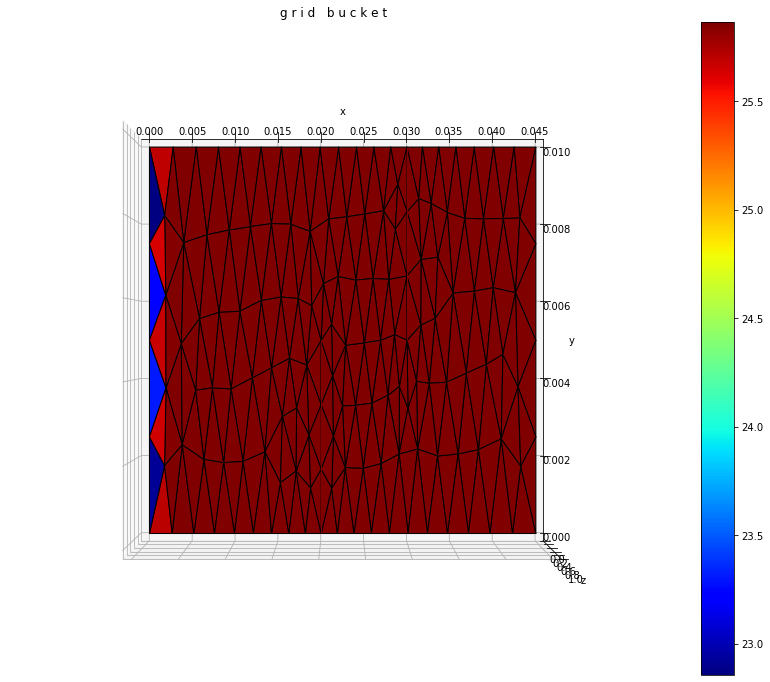

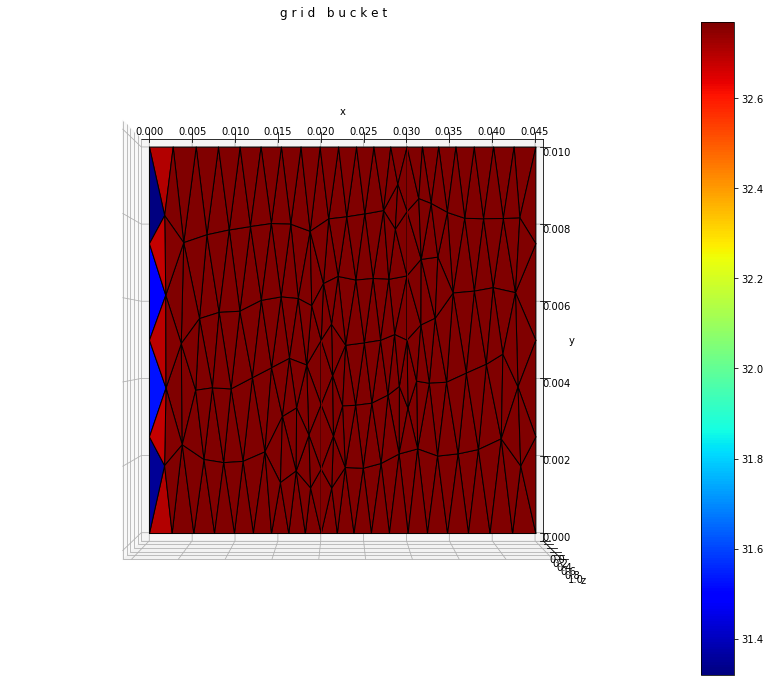

In [18]:
rd=np.zeros(tracer1.size)
#for i in range(10):
#for i in range(n_steps):

por=parameter_transp["por"]
por_frac=parameter_transp["por_frac"]

for i in range(1,n_steps+1,1):
#for i in range(1,4,1):
    rd=reaction.compute_rd(tracer1,rd)
    rhs_source_adv_Ca,rhs_mass_Ca,rhs_source_adv_CaSiO3,rhs_mass_CaSiO3,IEsolver_Ca,IEsolver_CaSiO3=chpor.change_por(por,por_frac,flow1,flow2,transport_Ca,transport_CaSiO3)
    
    if np.isclose((i-1) % save_every, 0):
            exporter1.write_vtu(export_field1, time_step=int((i-1) // save_every))
            exporter2.write_vtu(export_field2, time_step=int((i-1) // save_every))
            #for g,d in gb:
                #print("Ca")
                #print(d[pp.STATE]["Ca"])
            #for g,d in gb1:
                #print("CaSiO3")
                #print(d[pp.STATE]["CaSiO3"])
            #print("FINE")
            #print("rd")
            #print(rd)
    #rd=reaction.compute_rd(tracer1,rd)
    tracer1 = IEsolver_Ca(rhs_mass_Ca * tracer1 + rhs_source_adv_Ca+rhs_mass_Ca*rd*tracer2*parameter["time_step"])
    tracer2 = IEsolver_CaSiO3(rhs_mass_Ca * tracer2 + rhs_source_adv_CaSiO3-rhs_mass_CaSiO3*rd*tracer2*parameter["time_step"])
    
    assembler_Ca.distribute_variable(
        tracer1,
        variable_names=[Ca,transport_Ca.mortar_variable+Ca],
    )
    
    assembler_boh.distribute_variable(
        tracer2,
        variable_names=[CaSiO3,transport_CaSiO3.mortar_variable+CaSiO3],
    )
    
    assembler_CaSiO3.distribute_variable(
        tracer2,
        variable_names=[CaSiO3,transport_CaSiO3.mortar_variable+CaSiO3],
    )
    
    #por,por_frac=compute_new_porosity(gb1)
    
exporter1.write_vtu(export_field1, time_step=(n_steps // save_every))
time_steps = np.arange(
    0, parameter["t_max"] + parameter["time_step"], save_every * parameter["time_step"]
)
    
exporter2.write_vtu(export_field2, time_step=(n_steps // save_every))
time_steps = np.arange(
    0, parameter["t_max"] + parameter["time_step"], save_every * parameter["time_step"]
)
exporter1.write_pvd(time_steps)
exporter2.write_pvd(time_steps)
transport_Ca.plot_tracer(Ca)
transport_CaSiO3.plot_tracer(CaSiO3)
#ciao?9

In [19]:
print(transport_Ca.mortar_variable)

mortar_tracer


In [20]:
print(gb)

Mixed dimensional grid. 
Maximum dimension present: 2 
Minimum dimension present: 1 
Size of highest dimensional grid: Cells: 246. Nodes: 154
In lower dimensions: 
2 grids of dimension 1, with in total 6 cells and 8 nodes. 
Total number of interfaces: 2
2 interfaces between grids of dimension 2 and 1



In [21]:
for g,d in gb:
    print("Ca")
    print(d[pp.STATE]["Ca"])
    print("CaSiO3")
    print(d[pp.STATE]["CaSiO3"])

Ca
[25.86024064 25.86024064 25.86024064 25.86024064 25.86024064 25.86024064
 25.86024064 25.86024064 25.86024064 25.86024064 25.86024064 25.86024064
 25.86024064 25.86024064 25.86024064 25.86024064 25.86024064 25.86024545
 25.86024064 25.86024064 25.86024064 25.86024064 25.86024064 25.86024064
 25.86024064 25.86023889 25.86024064 25.86024064 25.86024064 25.86024064
 25.86024064 25.86024064 25.86024064 25.86024064 25.86024064 25.86024064
 25.86024074 25.86024064 25.86024064 25.86024064 25.86024064 25.86024064
 25.86024064 25.86024064 25.86024064 25.86024064 25.86024064 25.86024064
 25.86024064 25.86024064 25.86024064 25.86024064 25.86024064 25.86024064
 25.86024062 25.86024064 25.86024064 25.86024064 25.86024064 25.86024064
 25.86024064 25.86024063 25.86024064 25.86024064 25.86024064 25.86024064
 25.8596384  25.86024064 25.86024064 25.86024064 25.86024064 25.86024064
 25.86024064 25.86024064 25.86024064 25.86024064 25.86021232 25.86024064
 25.86024066 25.86024064 25.86024064 25.86024064

In [22]:
for g,d in gb1:
    print("CaSiO3")
    print(d[pp.STATE]["CaSiO3"])

CaSiO3
[32.76615936 32.76615936 32.76615936 32.76615936 32.76615936 32.76615936
 32.76615936 32.76615936 32.76615936 32.76615936 32.76615936 32.76615936
 32.76615936 32.76615936 32.76615936 32.76615936 32.76615936 32.76616068
 32.76615936 32.76615936 32.76615936 32.76615936 32.76615936 32.76615936
 32.76615936 32.76615853 32.76615936 32.76615936 32.76615936 32.76615936
 32.76615936 32.76615936 32.76615936 32.76615936 32.76615936 32.76615936
 32.76615937 32.76615936 32.76615936 32.76615936 32.76615936 32.76615936
 32.76615936 32.76615936 32.76615936 32.76615936 32.76615936 32.76615936
 32.76615936 32.76615936 32.76615936 32.76615936 32.76615936 32.76615936
 32.76615936 32.76615936 32.76615936 32.76615936 32.76615936 32.76615936
 32.76615936 32.76615936 32.76615936 32.76615936 32.76615936 32.76615936
 32.7660026  32.76615936 32.76615936 32.76615936 32.76615936 32.76615936
 32.76615936 32.76615936 32.76615936 32.76615936 32.7661531  32.76615936
 32.76615937 32.76615936 32.76615936 32.7661

In [23]:
2512537.68844221
251231.


251231.0